<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Worksheets/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)


In [ ]:
# the column info (how many columns, what type of data, any missing data?)
print(iris_data.info())
# print(iris_data.shape)
# print(type(iris_data))
print(iris_data.isnull().values.any())
iris_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
False


sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [ ]:
# data = iris_data.drop_duplicates(subset =['Species'])
# data

In [ ]:
# Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
print(iris_data.head(10))
print(iris_data.tail(10))

   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8  

In [ ]:
# how many unique values there are in the species column
species_type = iris_data['species'].unique()
print("----The following are the three class or species types of iris in the data set ---- \n",*species_type, sep = "   ")
# count the number of distinct observations for each column 
print("\n----The number of distinct observations for each column -----")
print(iris_data.nunique())

----The following are the three class or species types of iris in the data set ---- 
   Iris-setosa   Iris-versicolor   Iris-virginica

----The number of distinct observations for each column -----
sepal-length    35
sepal-width     23
petal-length    43
petal-width     22
species          3
dtype: int64


In [ ]:
# Find out the maximum, minimum, median and upper and lower quartile values in each of the columns
print(iris_data.describe().T)
# print(iris_data.groupby("species").describe())
# print('----max-----')
# print(iris_data[['sepal-length', 'sepal-width',  'petal-length',  'petal-width']].max())

              count      mean       std  min  25%   50%  75%  max
sepal-length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal-width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal-length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal-width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [ ]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train, test = train_test_split(iris_data, test_size=0.30)
print(train.describe().T)

              count      mean       std  min  25%  50%  75%  max
sepal-length  105.0  5.840000  0.808322  4.4  5.1  5.8  6.4  7.7
sepal-width   105.0  3.026667  0.407918  2.2  2.8  3.0  3.2  4.4
petal-length  105.0  3.823810  1.743644  1.0  1.6  4.4  5.1  6.9
petal-width   105.0  1.238095  0.769413  0.1  0.3  1.4  1.8  2.5


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [ ]:
# Drop any null values from each column
# print("any null values in sepal-length ? = " ,train['sepal-length'].isnull().values.any())
# print("any null values in sepal-width ? = " ,train['sepal-width'].isnull().values.any())
# print("any null values in petal-length ? = " ,train['petal-length'].isnull().values.any())
# print("any null values in petal-width ? = " ,train['petal-width'].isnull().values.any())

train.dropna(subset = ["sepal-length", "sepal-width","petal-length","petal-width"])

,sepal-length,sepal-width,petal-length,petal-width,species
138,6.0,3.0,4.8,1.8,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
139,6.9,3.1,5.4,2.1,Iris-virginica
...,...,...,...,...,...
22,4.6,3.6,1.0,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica


In [ ]:
# select from the iris DataFrame only the rows where the Class equals the string "Iris-setosa"
iris_virginica = train[train['species'] == "Iris-virginica"] 
iris_versicolor = train[train['species'] == "Iris-versicolor"] 
iris_setosa = train[train['species'] == "Iris-setosa"]  
print(iris_virginica)
print(iris_versicolor)
print(iris_setosa)

     sepal-length  sepal-width  petal-length  petal-width         species
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
111           6.4          2.7           5.3          1.9  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
104           6.5          3.0           5.8          2.2  Iris-virginica
112           6.8          3.0           5.5          2.1  Iris-virginica
108           6.7          2.5           5.8          1.8  Iris-virginica
106           4.9          2.5           4.5          1.7  Iris-virginica
114           5.8          2.8           5.1          2.4  Iris-virginica
121           5.6          2.8           4.9          2.0  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
109           7.2          3.6        

In [ ]:
train.shape, test.shape
print(train.describe().T)

              count      mean       std  min  25%  50%  75%  max
sepal-length  105.0  5.840000  0.808322  4.4  5.1  5.8  6.4  7.7
sepal-width   105.0  3.026667  0.407918  2.2  2.8  3.0  3.2  4.4
petal-length  105.0  3.823810  1.743644  1.0  1.6  4.4  5.1  6.9
petal-width   105.0  1.238095  0.769413  0.1  0.3  1.4  1.8  2.5


In [ ]:
# find the mean for each of the 4 size columns
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()    
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('sepal_length_mean = ', sepal_length_mean, ' sepal_width_mean = ', sepal_width_mean)
print('petal_length_mean = ', petal_length_mean, ' petal_width_mean =', petal_width_mean)

sepal_length_mean =  5.840000000000002  sepal_width_mean =  3.026666666666665
petal_length_mean =  3.823809523809524  petal_width_mean = 1.2380952380952384


In [ ]:
# train.groupby('species')['sepal-length'].mean()
# train[['sepal-length','sepal-width','petal-length','petal-width']].mean()

In [ ]:
# train.groupby('species')[['sepal-length','sepal-width','petal-length','petal-width']].mean()

In [ ]:

# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] >= indicator:
    return 1
  return 0

encodedmean_train = train.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
# train['sepal-length'] = train.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())
encodedmean_train['sepal-length'] = encodedmean_train.apply(encode, axis=1, key='sepal-length', indicator=sepal_length_mean)
encodedmean_train['sepal-width'] = encodedmean_train.apply(encode, axis=1, key='sepal-width', indicator=sepal_width_mean)
encodedmean_train['petal-length'] = encodedmean_train.apply(encode, axis=1, key='petal-length', indicator=petal_length_mean)
encodedmean_train['petal-width'] = encodedmean_train.apply(encode, axis=1, key='petal-width', indicator=petal_width_mean)

# encodedmean_train = train[(train['species']=='Iris-virginica')][['species','encodedmean-sl','encodedmean-sw','encodedmean-pl','encodedmean-pw']]
# encodedmean_train = train.copy()
# encodedmean_train.drop('sepal-length', axis=1, inplace=True) #inplace=True : specifies the drop operation to be in same dataframe rather creating a copy of the dataframe after drop.
# encodedmean_train.drop('sepal-width', axis=1, inplace=True)
# encodedmean_train.drop('petal-length', axis=1, inplace=True)
# encodedmean_train.drop('petal-width', axis=1, inplace=True)
# display(train) 
display(encodedmean_train)

,sepal-length,sepal-width,petal-length,petal-width,species
138,1,0,1,1,Iris-virginica
57,0,0,0,0,Iris-versicolor
61,1,0,1,1,Iris-versicolor
69,0,0,1,0,Iris-versicolor
139,1,1,1,1,Iris-virginica
...,...,...,...,...,...
22,0,1,0,0,Iris-setosa
16,0,1,0,0,Iris-setosa
144,1,1,1,1,Iris-virginica
124,1,1,1,1,Iris-virginica


In [ ]:
print(encodedmean_train['species'].value_counts())
encodedmean_train.shape

Iris-virginica     38
Iris-versicolor    34
Iris-setosa        33
Name: species, dtype: int64


(105, 5)

### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
# print(encodedmean_train[encodedmean_train['sepal-length'] == 1].shape[0])
# print(encodedmean_train[encodedmean_train['sepal-length'] == 1]['species'].count())
# print(encodedmean_train[(encodedmean_train['sepal-length'] == 1) & (encodedmean_train['species'] == 'Iris-virginica')]['species'].count())
# calculate the proportion of those ABOVE the mean
def cal_proportion_abovemean(df, specie, part_field):
  ### This function is for calculating the proportion of each column that are on or above mean that are of a species. (ie proportion of petal-lengths on or above mean that are Iris-virginica)###
  results = df[(df[part_field] == 1) & (df['species'] == specie)]
  proportion = round(results['species'].count()/ df[df[part_field] == 1]['species'].count(),4) #df[df[part_field] == 1].shape[0] #
  print(part_field , "  , number of row = ",  results['species'].count(), ", total row above mean = ", df[df[part_field] == 1]['species'].count()," ,Proportion = ", proportion)
  return results, proportion

In [ ]:
# Get the dataframes and proportion calcuations of those ABOVE the mean for 3 species
print("-----------------------------------value >= mean for Iris-virginica -----------------------------------")
df_sl_virginica_abovemean,proportion_sl_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'sepal-length')
# display(df_col1_virginica_abovemean)
df_sw_virginica_abovemean,proportion_sw_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'sepal-width') 
df_pl_virginica_abovemean,proportion_pl_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'petal-length') 
df_pw_virginica_abovemean,proportion_pw_virginica_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-virginica', 'petal-width') 
print("-----------------------------------value >= mean for Iris-versicolor-----------------------------------")
df_sl_versicolor_abovemean,proportion_sl_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'sepal-length') 
df_sw_versicolor_abovemean,proportion_sw_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'sepal-width') 
df_pl_versicolor_abovemean,proportion_pl_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'petal-length') 
df_pw_versicolor_abovemean,proportion_pw_versicolor_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-versicolor', 'petal-width') 

print("-----------------------------------value >= mean for Iris-setosa-----------------------------------")
df_sl_setosa_abovemean,proportion_sl_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'sepal-length') 
df_sw_setosa_abovemean,proportion_sw_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'sepal-width') 
df_pl_setosa_abovemean,proportion_pl_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'petal-length') 
df_pw_setosa_abovemean,proportion_pw_setosa_abovemean = cal_proportion_abovemean(encodedmean_train, 'Iris-setosa', 'petal-width') 


-----------------------------------value >= mean for Iris-virginica -----------------------------------
sepal-length   , number of row =  33 , total row above mean =  50  ,Proportion =  0.66
sepal-width   , number of row =  13 , total row above mean =  44  ,Proportion =  0.2955
petal-length   , number of row =  38 , total row above mean =  67  ,Proportion =  0.5672
petal-width   , number of row =  38 , total row above mean =  61  ,Proportion =  0.623
-----------------------------------value >= mean for Iris-versicolor-----------------------------------
sepal-length   , number of row =  17 , total row above mean =  50  ,Proportion =  0.34
sepal-width   , number of row =  4 , total row above mean =  44  ,Proportion =  0.0909
petal-length   , number of row =  29 , total row above mean =  67  ,Proportion =  0.4328
petal-width   , number of row =  23 , total row above mean =  61  ,Proportion =  0.377
-----------------------------------value >= mean for Iris-setosa---------------------------

### Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [ ]:
# calculate the proportion of results where the value is below mean that are of the species Iris-virginica
# the proportion of those BELOW the mean
def cal_proportion_belowmean(df, specie, part_field):
  results = df[(df[part_field] == 0) & (df['species'] == specie)]
  proportion = round(results['species'].count()/ df[df[part_field] == 0]['species'].count(),4) #df[df[part_field] == 0].shape[0] # 
  print(part_field , "  , number of row = ",  results['species'].count(), ", total count below mean= ",df[df[part_field] == 0]['species'].count(), ", Proportion = ", proportion)
  return results, proportion  


In [ ]:
# Get the dataframes and proportion calcuations of those BELOW the mean for 3 species
print("-----------------------------------value < mean for Iris-virginica -----------------------------------")
df_sl_virginica_belowmean,proportion_sl_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'sepal-length')
# display(df_col1_virginica)
df_sw_virginica_belowmean,proportion_sw_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'sepal-width') 
df_pl_virginica_belowmean,proportion_pl_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'petal-length') 
df_pw_virginica_belowmean,proportion_pw_virginica_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-virginica', 'petal-width') 

-----------------------------------value < mean for Iris-virginica -----------------------------------
sepal-length   , number of row =  5 , total count below mean=  55 , Proportion =  0.0909
sepal-width   , number of row =  25 , total count below mean=  61 , Proportion =  0.4098
petal-length   , number of row =  0 , total count below mean=  38 , Proportion =  0.0
petal-width   , number of row =  0 , total count below mean=  44 , Proportion =  0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [ ]:
print("-----------------------------------value < mean for Iris-versicolor-----------------------------------")
df_sl_versicolor_belowmean,proportion_sl_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'sepal-length') 
df_sw_versicolor_belowmean,proportion_sw_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'sepal-width') 
df_pl_versicolor_belowmean,proportion_pl_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'petal-length') 
df_pw_versicolor_belowmean,proportion_pw_versicolor_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-versicolor', 'petal-width') 

print("-----------------------------------value < mean for Iris-setosa-----------------------------------")
df_sl_setosa_belowmean,proportion_sl_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'sepal-length') 
df_sw_setosa_belowmean,proportion_sw_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'sepal-width') 
df_pl_setosa_belowmean,proportion_pl_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'petal-length') 
df_pw_setosa_belowmean,proportion_pw_setosa_belowmean = cal_proportion_belowmean(encodedmean_train, 'Iris-setosa', 'petal-width') 

-----------------------------------value < mean for Iris-versicolor-----------------------------------
sepal-length   , number of row =  17 , total count below mean=  55 , Proportion =  0.3091
sepal-width   , number of row =  30 , total count below mean=  61 , Proportion =  0.4918
petal-length   , number of row =  5 , total count below mean=  38 , Proportion =  0.1316
petal-width   , number of row =  11 , total count below mean=  44 , Proportion =  0.25
-----------------------------------value < mean for Iris-setosa-----------------------------------
sepal-length   , number of row =  33 , total count below mean=  55 , Proportion =  0.6
sepal-width   , number of row =  6 , total count below mean=  61 , Proportion =  0.0984
petal-length   , number of row =  33 , total count below mean=  38 , Proportion =  0.8684
petal-width   , number of row =  33 , total count below mean=  44 , Proportion =  0.75


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [ ]:
# Create a list of dictionaries from the result Exercise 4 and 5
propotion_list = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_mean':[proportion_sl_virginica_abovemean,proportion_sw_virginica_abovemean,proportion_pl_virginica_abovemean,proportion_pw_virginica_abovemean],
 'below_mean':[proportion_sl_virginica_belowmean, proportion_sw_virginica_belowmean,proportion_pl_virginica_belowmean,proportion_pw_virginica_belowmean]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_mean':[proportion_sl_versicolor_abovemean,proportion_sw_versicolor_abovemean,proportion_pl_versicolor_abovemean,proportion_pw_versicolor_abovemean],
 'below_mean':[proportion_sl_versicolor_belowmean, proportion_sw_versicolor_belowmean,proportion_pl_versicolor_belowmean,proportion_pw_versicolor_belowmean]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_mean':[proportion_sl_setosa_abovemean,proportion_sw_setosa_abovemean,proportion_pl_setosa_abovemean,proportion_pw_setosa_abovemean],
 'below_mean':[proportion_sl_setosa_belowmean, proportion_sw_setosa_belowmean,proportion_pl_setosa_belowmean,proportion_pw_setosa_belowmean]
}]
 
display(propotion_list, "\n")

[{'above_mean': [0.66, 0.2955, 0.5672, 0.623],
  'below_mean': [0.0909, 0.4098, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_mean': [0.34, 0.0909, 0.4328, 0.377],
  'below_mean': [0.3091, 0.4918, 0.1316, 0.25],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_mean': [0.0, 0.6136, 0.0, 0.0],
  'below_mean': [0.6, 0.0984, 0.8684, 0.75],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

'\n'

In [ ]:
# show which columns are reliable predictors 
# A reliable prediction may be one over 0.5
# reliable_predictors = {}
for spec in propotion_list:
  for key, value in spec.items():
    if key == 'species':
      print(spec[key] ,'\t\t\t Above Mean', '\t\t\tBelow Mean')
    if key == 'type':
      for t, a, b in zip(spec['type'], spec['above_mean'], spec['below_mean']):
          # print('\t\t', t, '\t\t\t', a, '\t\t\t', b)
          if a >= 0.5:
            print('\t\t', t, '\t\t\t', a, '\t\t\t', ' ')
          elif b >= 0.5:  
            print('\t\t', t, '\t\t\t', ' ' , '\t\t\t', b)
        

Iris-virginica 			 Above Mean 			Below Mean
		 sepal-length 			 0.66 			  
		 petal-length 			 0.5672 			  
		 petal-width 			 0.623 			  
Iris-versicolor 			 Above Mean 			Below Mean
Iris-setosa 			 Above Mean 			Below Mean
		 sepal-length 			   			 0.6
		 sepal-width 			 0.6136 			  
		 petal-length 			   			 0.8684
		 petal-width 			   			 0.75


### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




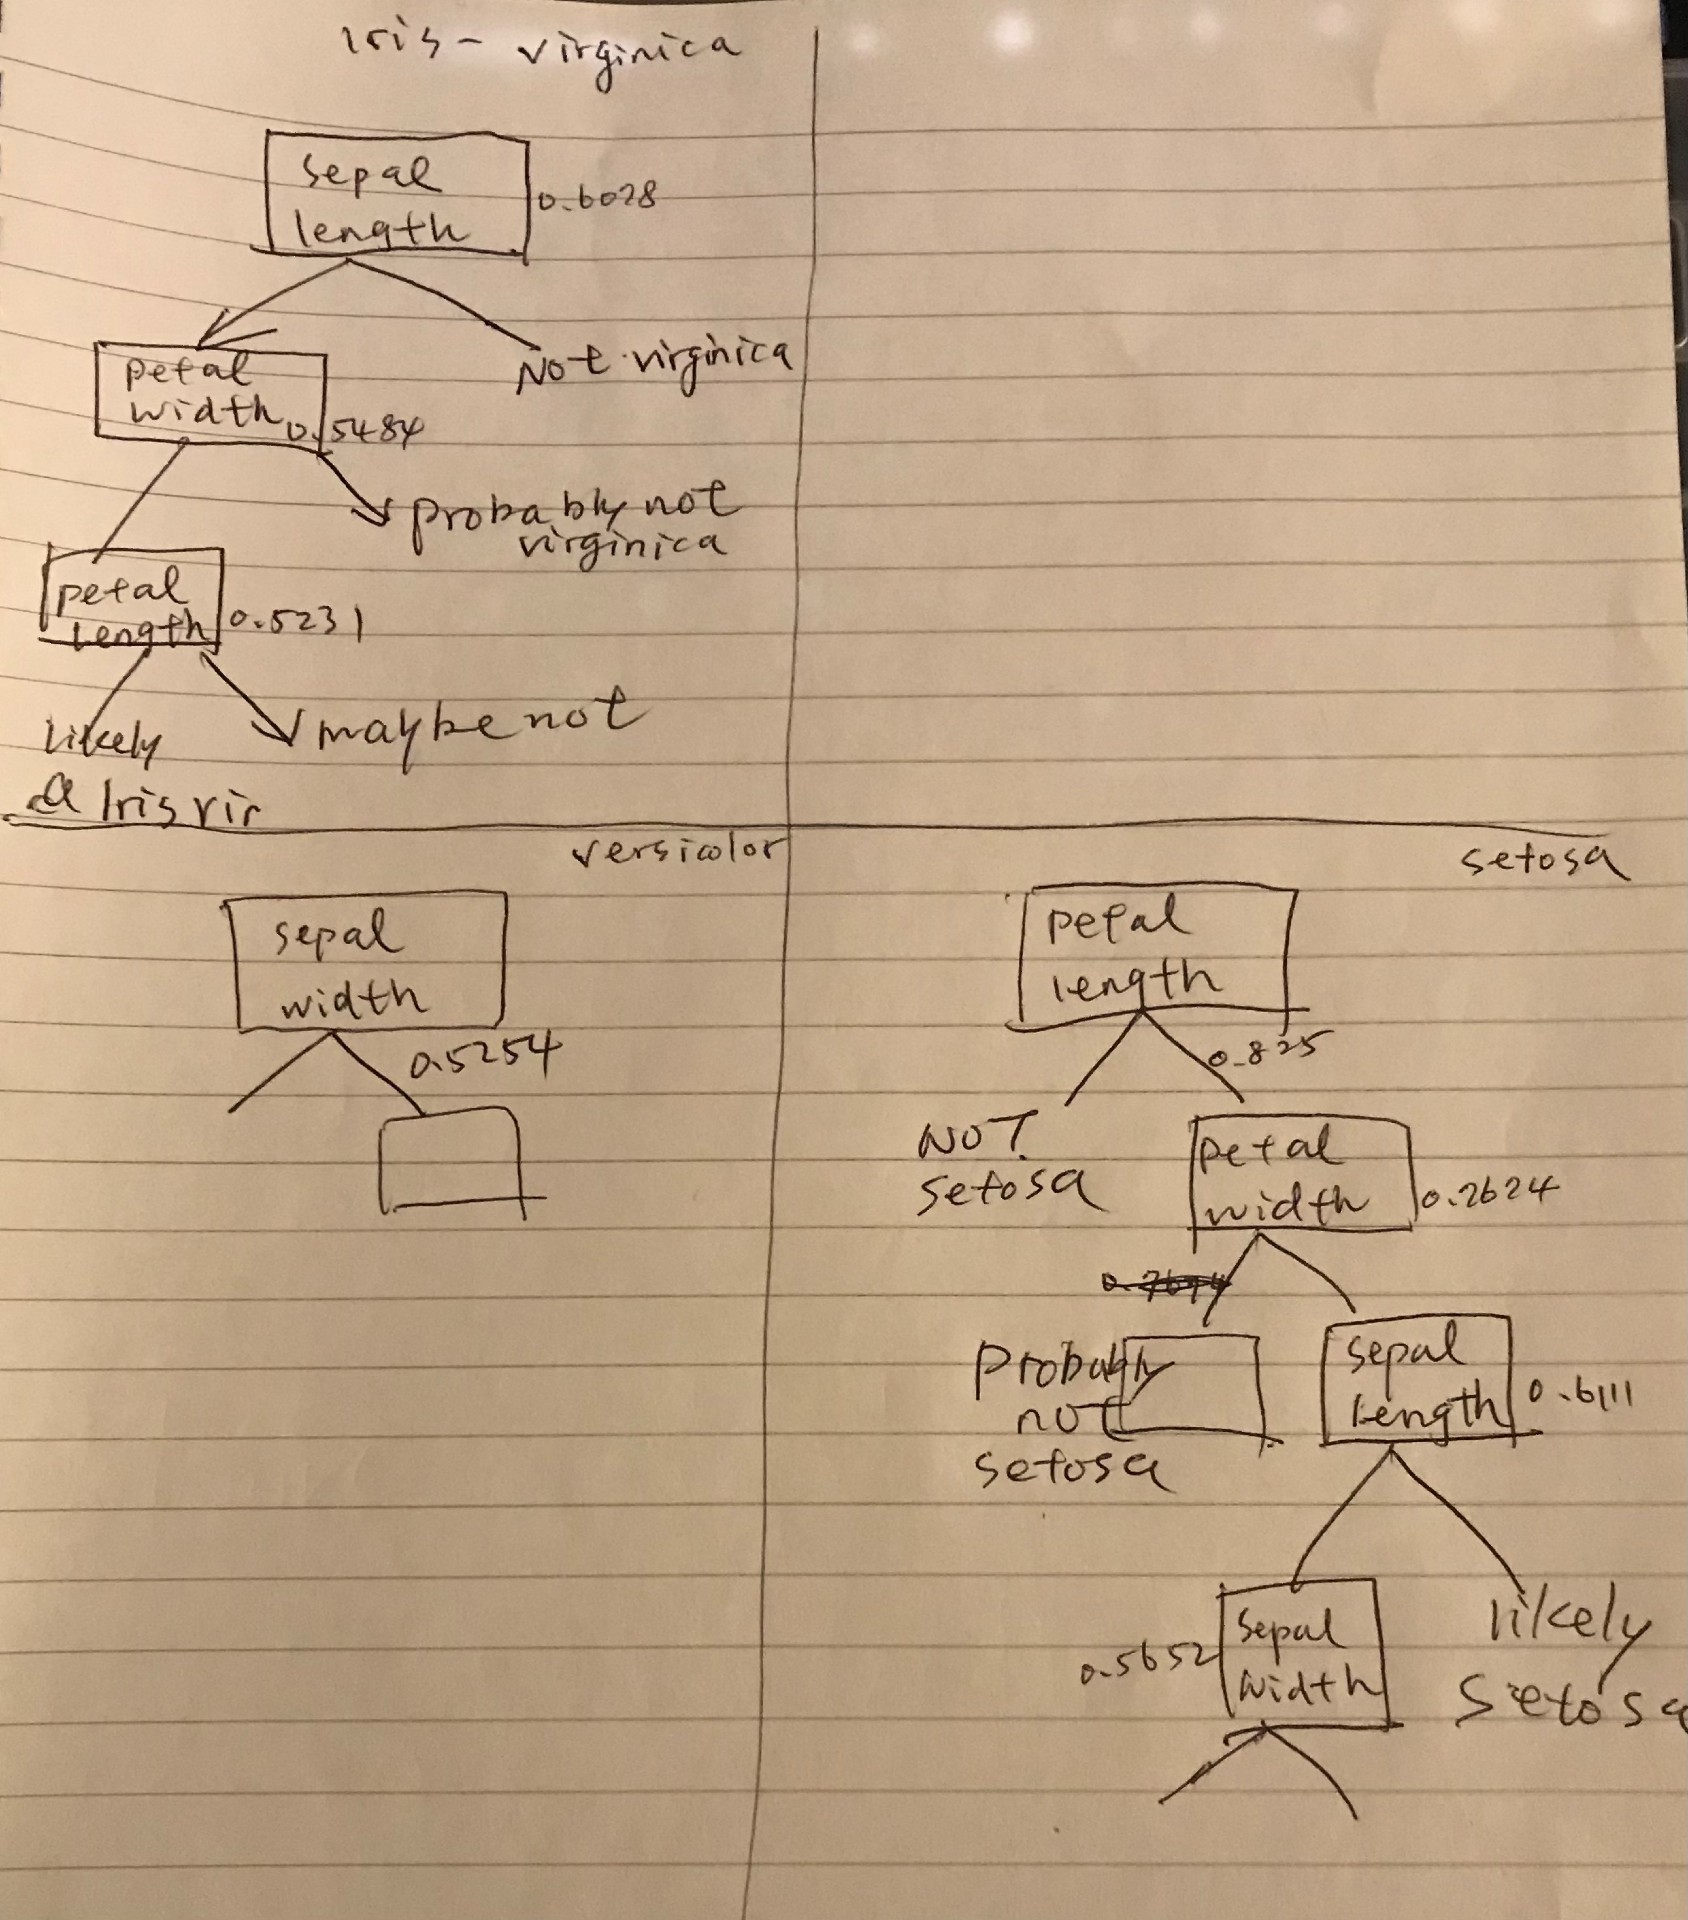

In [ ]:
# find the mean for each of the 4 size columns
sl_mean = test['sepal-length'].mean()
sw_mean = test['sepal-width'].mean()
pl_mean = test['petal-length'].mean()
pw_mean = test['petal-width'].mean()    
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('sl_mean = ', sl_mean, ' sw_mean = ', sw_mean)
print('pl_mean = ', pl_mean, ' pw_mean =', pw_mean)

sl_mean =  5.851111111111111  sw_mean =  3.117777777777778
pl_mean =  3.6066666666666674  pw_mean = 1.1066666666666667


In [ ]:
test1 = test.copy()
# encode the 4 columns 
test['sepal-length'] = test.apply(encode, axis=1, key='sepal-length', indicator=sl_mean)
test['sepal-width'] = test.apply(encode, axis=1, key='sepal-width', indicator=sw_mean)
test['petal-length'] = test.apply(encode, axis=1, key='petal-length', indicator=pl_mean)
test['petal-width'] = test.apply(encode, axis=1, key='petal-width', indicator=pw_mean)
display(test.info())
test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 131 to 44
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal-length  45 non-null     int64 
 1   sepal-width   45 non-null     int64 
 2   petal-length  45 non-null     int64 
 3   petal-width   45 non-null     int64 
 4   species       45 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


None

,sepal-length,sepal-width,petal-length,petal-width,species
131,1,1,1,1,Iris-virginica
51,1,1,1,1,Iris-versicolor
23,0,1,0,0,Iris-setosa
21,0,1,0,0,Iris-setosa
14,0,1,0,0,Iris-setosa
18,0,1,0,0,Iris-setosa
70,1,1,1,1,Iris-versicolor
99,0,0,1,1,Iris-versicolor
4,0,1,0,0,Iris-setosa
100,1,1,1,1,Iris-virginica


In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  if df['species'] == 'Iris-virginica':
    if df['sepal-length'] == 0:
      return None
    elif df['petal-width'] == 0:
      return None
    elif df['petal-length'] == 0:
      return None
    else:
      return 'Iris-virginica'


# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
print(test_size)
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1
print(correct)
print ("Proportion correctly identified", correct / test_size) 


45
11
Proportion correctly identified 0.24444444444444444


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [ ]:
def cal_median(df, key):
  return df[key].median()

sepal_length_median = cal_median(test1, 'sepal-length') #train['sepal-length'].mean()
sepal_width_median = cal_median(test1, 'sepal-width') #train['sepal-width'].mean()
petal_length_median = cal_median(test1, 'petal-length') #train['petal-length'].mean()
petal_width_median = cal_median(test1, 'petal-width') #train['petal-width'].mean()    
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('sepal_length_median = ', sepal_length_median, ' sepal_width_median = ', sepal_width_median)
print('petal_length_median = ', petal_length_median, ' petal_width_median =', petal_width_median)

sepal_length_median =  5.7  sepal_width_median =  3.1
petal_length_median =  4.1  petal_width_median = 1.3


In [ ]:
# Get the dataframes and proportion calcuations of those ABOVE the median for 3 species
print("---------------value >= median for Iris-virginica Use the same funtion for mean-----------------------------------")
df_sl_virginica_abovemedian,proportion_sl_virginica_abovemedian = cal_proportion_abovemean(test, 'Iris-virginica', 'sepal-length')
# display(df_col1_virginica_abovemean)
df_sw_virginica_abovemedian,proportion_sw_virginica_abovemedian = cal_proportion_abovemean(test, 'Iris-virginica', 'sepal-width') 
df_pl_virginica_abovemedian,proportion_pl_virginica_abovemedian = cal_proportion_abovemean(test, 'Iris-virginica', 'petal-length') 
df_pw_virginica_abovemedian,proportion_pw_virginica_abovemedian = cal_proportion_abovemean(test, 'Iris-virginica', 'petal-width') 
print("---------------value >= median for Iris-versicolor  Use the same funtion for mean-----------------------------------")
df_sl_versicolor_abovemedian,proportion_sl_versicolor_abovemedian = cal_proportion_abovemean(test, 'Iris-versicolor', 'sepal-length') 
df_sw_versicolor_abovemedian,proportion_sw_versicolor_abovemedian = cal_proportion_abovemean(test, 'Iris-versicolor', 'sepal-width') 
df_pl_versicolor_abovemedian,proportion_pl_versicolor_abovemedian = cal_proportion_abovemean(test, 'Iris-versicolor', 'petal-length') 
df_pw_versicolor_abovemedian,proportion_pw_versicolor_abovemedian = cal_proportion_abovemean(test, 'Iris-versicolor', 'petal-width') 

print("---------------value >= median for Iris-setosa  Use the same funtion for mean-----------------------------------")
df_sl_setosa_abovemedian,proportion_sl_setosa_abovemedian = cal_proportion_abovemean(test, 'Iris-setosa', 'sepal-length') 
df_sw_setosa_abovemedian,proportion_sw_setosa_abovemedian = cal_proportion_abovemean(test, 'Iris-setosa', 'sepal-width') 
df_pl_setosa_abovemedian,proportion_pl_setosa_abovemedian = cal_proportion_abovemean(test, 'Iris-setosa', 'petal-length') 
df_pw_setosa_abovemedian,proportion_pw_setosa_abovemedian = cal_proportion_abovemean(test, 'Iris-setosa', 'petal-width') 


---------------value >= median for Iris-virginica Use the same funtion for mean-----------------------------------
sepal-length   , number of row =  11 , total row above mean =  20  ,Proportion =  0.55
sepal-width   , number of row =  4 , total row above mean =  20  ,Proportion =  0.2
petal-length   , number of row =  12 , total row above mean =  26  ,Proportion =  0.4615
petal-width   , number of row =  12 , total row above mean =  25  ,Proportion =  0.48
---------------value >= median for Iris-versicolor  Use the same funtion for mean-----------------------------------
sepal-length   , number of row =  9 , total row above mean =  20  ,Proportion =  0.45
sepal-width   , number of row =  3 , total row above mean =  20  ,Proportion =  0.15
petal-length   , number of row =  14 , total row above mean =  26  ,Proportion =  0.5385
petal-width   , number of row =  13 , total row above mean =  25  ,Proportion =  0.52
---------------value >= median for Iris-setosa  Use the same funtion for mea

In [ ]:
# Get the dataframes and proportion calcuations of those BELOW the Median for 3 species
print("-----------------------------------value < median for Iris-virginica  Use the same funtion for mean-----------------------------------")
df_sl_virginica_belowmedian,proportion_sl_virginica_belowmedian = cal_proportion_belowmean(test, 'Iris-virginica', 'sepal-length')
# display(df_col1_virginica)
df_sw_virginica_belowmedian,proportion_sw_virginica_belowmedian = cal_proportion_belowmean(test, 'Iris-virginica', 'sepal-width') 
df_pl_virginica_belowmedian,proportion_pl_virginica_belowmedian = cal_proportion_belowmean(test, 'Iris-virginica', 'petal-length') 
df_pw_virginica_belowmedian,proportion_pw_virginica_belowmedian = cal_proportion_belowmean(test, 'Iris-virginica', 'petal-width') 
print("-----------------------------------value < median for Iris-versicolor Use the same funtion for mean-----------------------------------")
df_sl_versicolor_belowmedian,proportion_sl_versicolor_belowmedian = cal_proportion_belowmean(test, 'Iris-versicolor', 'sepal-length') 
df_sw_versicolor_belowmedian,proportion_sw_versicolor_belowmedian = cal_proportion_belowmean(test, 'Iris-versicolor', 'sepal-width') 
df_pl_versicolor_belowmedian,proportion_pl_versicolor_belowmedian = cal_proportion_belowmean(test, 'Iris-versicolor', 'petal-length') 
df_pw_versicolor_belowmedian,proportion_pw_versicolor_belowmedian = cal_proportion_belowmean(test, 'Iris-versicolor', 'petal-width') 

print("-----------------------------------value < median for Iris-setosa Use the same funtion for mean-----------------------------------")
df_sl_setosa_belowmedian,proportion_sl_setosa_belowmedian = cal_proportion_belowmean(test, 'Iris-setosa', 'sepal-length') 
df_sw_setosa_belowmedian,proportion_sw_setosa_belowmedian = cal_proportion_belowmean(test, 'Iris-setosa', 'sepal-width') 
df_pl_setosa_belowmedian,proportion_pl_setosa_belowmedian = cal_proportion_belowmean(test, 'Iris-setosa', 'petal-length') 
df_pw_setosa_belowmedian,proportion_pw_setosa_belowmedian = cal_proportion_belowmean(test, 'Iris-setosa', 'petal-width') 

-----------------------------------value < median for Iris-virginica  Use the same funtion for mean-----------------------------------
sepal-length   , number of row =  1 , total count below mean=  25 , Proportion =  0.04
sepal-width   , number of row =  8 , total count below mean=  25 , Proportion =  0.32
petal-length   , number of row =  0 , total count below mean=  19 , Proportion =  0.0
petal-width   , number of row =  0 , total count below mean=  20 , Proportion =  0.0
-----------------------------------value < median for Iris-versicolor Use the same funtion for mean-----------------------------------
sepal-length   , number of row =  7 , total count below mean=  25 , Proportion =  0.28
sepal-width   , number of row =  13 , total count below mean=  25 , Proportion =  0.52
petal-length   , number of row =  2 , total count below mean=  19 , Proportion =  0.1053
petal-width   , number of row =  3 , total count below mean=  20 , Proportion =  0.15
-----------------------------------va

In [ ]:
# Create a list of dictionaries from the result Exercise 4 and 5
propotion_list_median = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_mean':[proportion_sl_virginica_abovemedian,proportion_sw_virginica_abovemedian,proportion_pl_virginica_abovemedian,proportion_pw_virginica_abovemedian],
 'below_mean':[proportion_sl_virginica_belowmedian, proportion_sw_virginica_belowmedian,proportion_pl_virginica_belowmedian,proportion_pw_virginica_belowmedian]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_mean':[proportion_sl_versicolor_abovemedian,proportion_sw_versicolor_abovemedian,proportion_pl_versicolor_abovemedian,proportion_pw_versicolor_abovemedian],
 'below_mean':[proportion_sl_versicolor_belowmedian, proportion_sw_versicolor_belowmedian,proportion_pl_versicolor_belowmedian,proportion_pw_versicolor_belowmedian]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_mean':[proportion_sl_setosa_abovemedian,proportion_sw_setosa_abovemedian,proportion_pl_setosa_abovemedian,proportion_pw_setosa_abovemedian],
 'below_mean':[proportion_sl_setosa_belowmedian, proportion_sw_setosa_belowmedian,proportion_pl_setosa_belowmedian,proportion_pw_setosa_belowmedian]
}]
 
display(propotion_list_median, "\n")

[{'above_mean': [0.55, 0.2, 0.4615, 0.48],
  'below_mean': [0.04, 0.32, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_mean': [0.45, 0.15, 0.5385, 0.52],
  'below_mean': [0.28, 0.52, 0.1053, 0.15],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_mean': [0.0, 0.65, 0.0, 0.0],
  'below_mean': [0.68, 0.16, 0.8947, 0.85],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

'\n'

In [ ]:
from binascii import a2b_base64
for spec2 in propotion_list_median:
  for key2, value2 in spec2.items():
    if key2 == 'species':
      print(spec2[key2] ,'\t\t\t Above Median', '\t\t\tBelow Median')
    if key2 == 'type':
      for t2, a2, b2 in zip(spec2['type'], spec2['above_mean'], spec2['below_mean']):
          # print('\t\t', t, '\t\t\t', a, '\t\t\t', b)
          if a2 >= 0.5:
            print('\t\t', t2, '\t\t\t', a2, '\t\t\t', ' ')
          elif b2 >= 0.5:  
            print('\t\t', t2, '\t\t\t', ' ' , '\t\t\t', b2)

Iris-virginica 			 Above Median 			Below Median
		 sepal-length 			 0.55 			  
Iris-versicolor 			 Above Median 			Below Median
		 sepal-width 			   			 0.52
		 petal-length 			 0.5385 			  
		 petal-width 			 0.52 			  
Iris-setosa 			 Above Median 			Below Median
		 sepal-length 			   			 0.68
		 sepal-width 			 0.65 			  
		 petal-length 			   			 0.8947
		 petal-width 			   			 0.85


What do you notice? (write your answer here)

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


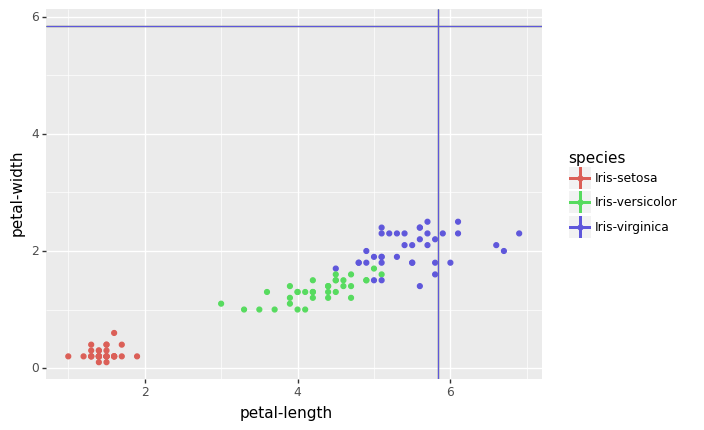

<ggplot: (8756352138821)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))